<a href="https://colab.research.google.com/github/Lotfullah21/Deep-Learning/blob/main/Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Softmax Function
In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector $\mathbf{z}$ is generated by a linear function which is applied to a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs  will correspond to larger output probabilities.


The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$
The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:
\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display,Markdown, Latex
from sklearn.datasets import make_blobs
from matplotlib.widgets import Slider

In [2]:
def softmax_fn(x):
  ez = np.exp(x)
  az = ez/ np.sum(ez)
  return ez

### Lets make a dataset

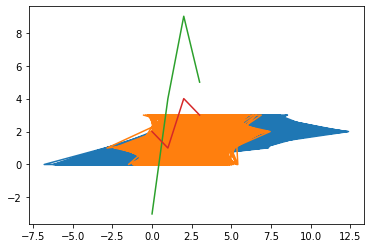

In [3]:
centers = [[-3,2],[4,1],[9,4],[5,3]]

X_train, y_train = make_blobs(n_samples = 20000, centers = centers, cluster_std = 1.0, random_state = 20)
plt.plot(X_train,y_train, centers)

In [4]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

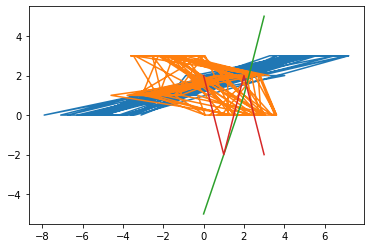

In [5]:
plt.plot(X_train,y_train, centers )

In [6]:
model = Sequential([
    Dense(45, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(4, activation = "softmax")
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(0.001)
              )

model.fit(X_train , y_train, epochs = 10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 1.4514
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 1.3185
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 1.2144
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 1.1310
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 1.0678
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 1.0115
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.9620
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.9175
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.8757
Epoch 10/10
4/4 [==============================] - 0s 7ms/step - loss: 0.8344


here , the lastlayer (output) is a vector of probabilities

In [7]:
prediction = model.predict(X_train)
print("the prediction for first output is", prediction[0])
print("the largest value", np.max(prediction[0]), "the smallest value",np.min(prediction[0]))
print("the ouput with largest probablility is", np.max(prediction[0]))
print("the largest value", np.max(prediction), "the smallest value",np.min(prediction))

the prediction for first output is [0.01990946 0.02598046 0.09797794 0.85613215]
the largest value 0.85613215 the smallest value 0.019909464
the ouput with largest probablility is 0.85613215
the largest value 0.9665426 the smallest value 0.0021903315


## Prefered modlel 
when dealing with small values and especially if we put them into the exponential form , the round of matters.

for example , X1 = 2/2000 = 0.00020000
and X = (1 + 1/1000)  - (1 - 1/1000)  = 0.00019999978 , if we sum the fraction that should lead us to X1 , but the values changes and the 2nd is more accurate numerically, if we calculate them, 

Hence , the 2nd way is preferred way of doing so, and in the loss function we will put the fraction rather than pre computed value.
the way to implement this in tensorflow, we will use linear instead of softmax in the output layer, and directly feed the z's : 
**( z = w * x = b )** to the model.
for example we had  **a = softmax(z)**.

we add from_logits=True in the loss function.

In [8]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 1.6701
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 1.5922
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 1.5175
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 1.4495
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 1.3858
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 1.3271
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 1.2753
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 1.2244
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 1.1804
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 1.1383


## Output
Now , we will see the difference in the output, from the previous model, here the ouptuts are not in probability range, the are from positive to negaetive values.

In [9]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:1]}")
print("largest value", np.max(p_preferred), "small|est value", np.min(p_preferred))

two example output vectors:
 [[-0.23985082 -0.03840235 -0.95403266  0.11513588]]
largest value 1.7479349 small|est value -1.5934961


if we need the output to be in probability format, we need to feed them through a softmax function.

In [10]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[0.2416085  0.29552904 0.1182897  0.34457278]
 [0.24640742 0.29155663 0.11696485 0.34507117]]
largest value 0.6194522 smallest value 0.06636068


if we don't want to use softmax , we can loop through and using np.argmax(), find the largest values and assign them 

In [11]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-0.23985082 -0.03840235 -0.95403266  0.11513588], category: 3
[-0.2325643  -0.06431642 -0.97767705  0.10420004], category: 3
[-0.25410914 -0.0436641  -1.011847    0.11800758], category: 3
[ 0.00482366 -0.18543965 -0.89268565 -0.42003202], category: 0
[-0.28197044  0.17074367 -0.5374781   0.0967424 ], category: 1


## SparseCategorialCrossentropy or CategoricalCrossEntropy
Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
- SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. 
- CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].


Source : https://www.coursera.org/learn/advanced-learning-algorithms/ungradedLab/7oaSL/softmax/lab?path=%2Fnotebooks%2FC2_W2_SoftMax.ipynb